In [1]:
import pandas as pd

fileURL = './breastcancer.csv'
breast_cancer_db = pd.read_csv(fileURL)
breast_cancer_db = breast_cancer_db.ix[:,1:32]

In [2]:
breast_cancer_db.loc[(breast_cancer_db['diagnosis'] == 'B'),'diagnosis'] = 0
breast_cancer_db.loc[(breast_cancer_db['diagnosis'] == 'M'),'diagnosis'] = 1
breast_cancer_db['diagnosis'] = pd.to_numeric(breast_cancer_db['diagnosis'])

In [19]:
breast_cancer_db.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
def get_X_y(feature_cols, target):
    X = breast_cancer_db[feature_cols]
    y = breast_cancer_db[target]
    return X, y

In [5]:
feature_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
               'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
               'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
               'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
               'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
               'smoothness_worst', 'smoothness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst',
               'fractal_dimension_worst']

target = 'diagnosis'
X, y = get_X_y(feature_cols, target)

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

Populating the interactive namespace from numpy and matplotlib


/Users/bingqinzhou/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['logistic']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


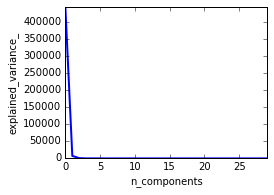

In [13]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

pca.fit(X)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [17]:
n_components = [2, 3, 5, 10, 15, 20, 30]
pca_gs = GridSearchCV(pipe, dict(pca__n_components=n_components), cv=5, scoring='accuracy') 
pca_gs.fit(X, y) 

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('pca', PCA(copy=True, n_components=None, whiten=False)), ('logistic', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'pca__n_components': [2, 3, 5, 10, 15, 20, 30]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [18]:
print(pca_gs.best_params_)

{'pca__n_components': 10}
